# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [3]:
df = pd.read_csv ('/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [6]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
for col in df.columns:
    print(f"Distribusi setiap value pada kolom '{col}':")
    print(df[col].value_counts())
    print ("-" * 50)

Distribusi setiap value pada kolom 'sex':
sex
Male      526415
Female    464931
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'age':
age
40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'height':
height
160    181809
165    178228
170    166328
155    165678
150    107929
175     98850
145     39176
180     35970
140      9100
185      6588
135      1241
190       363
130        86
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'weight':
weight
60     151134
55     150415
65     141241
50     125079
70     122281
75      90207
45      63047
80      58176
85      33708
90      18250
40      16639
95       9655
100    

In [8]:
print(df.duplicated().sum())
df = df.drop_duplicates()

26


DRK_YN
N    495844
Y    495476
Name: count, dtype: int64


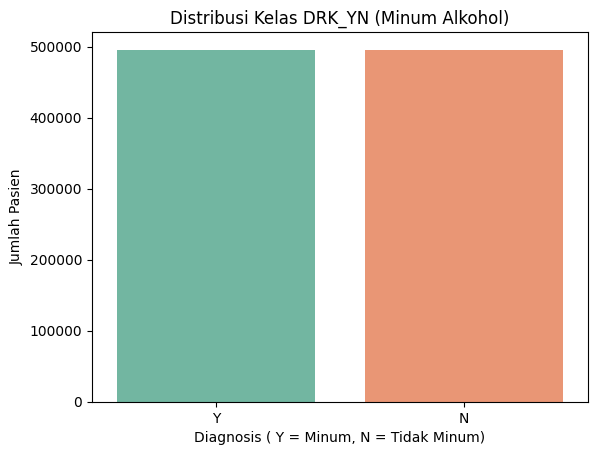

In [9]:
print(df['DRK_YN'].value_counts())

sns.countplot(x='DRK_YN', data=df, palette='Set2')
plt.title('Distribusi Kelas DRK_YN (Minum Alkohol)')
plt.xlabel('Diagnosis ( Y = Minum, N = Tidak Minum)')
plt.ylabel('Jumlah Pasien')
plt.show()

In [10]:
kolom_numerik = [
    'age', 'height', 'weight', 'waistline',
    'sight_left', 'sight_right',
    'SBP', 'DBP', 'BLDS',
    'tot_chole', 'HDL_chole', 'LDL_chole',
    'triglyceride', 'hemoglobin', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

kategorikal = ['sex', 'hear_left','hear_right', 'SMK_stat_type_cd','urine_protein']

cek outlier metode *IQR*

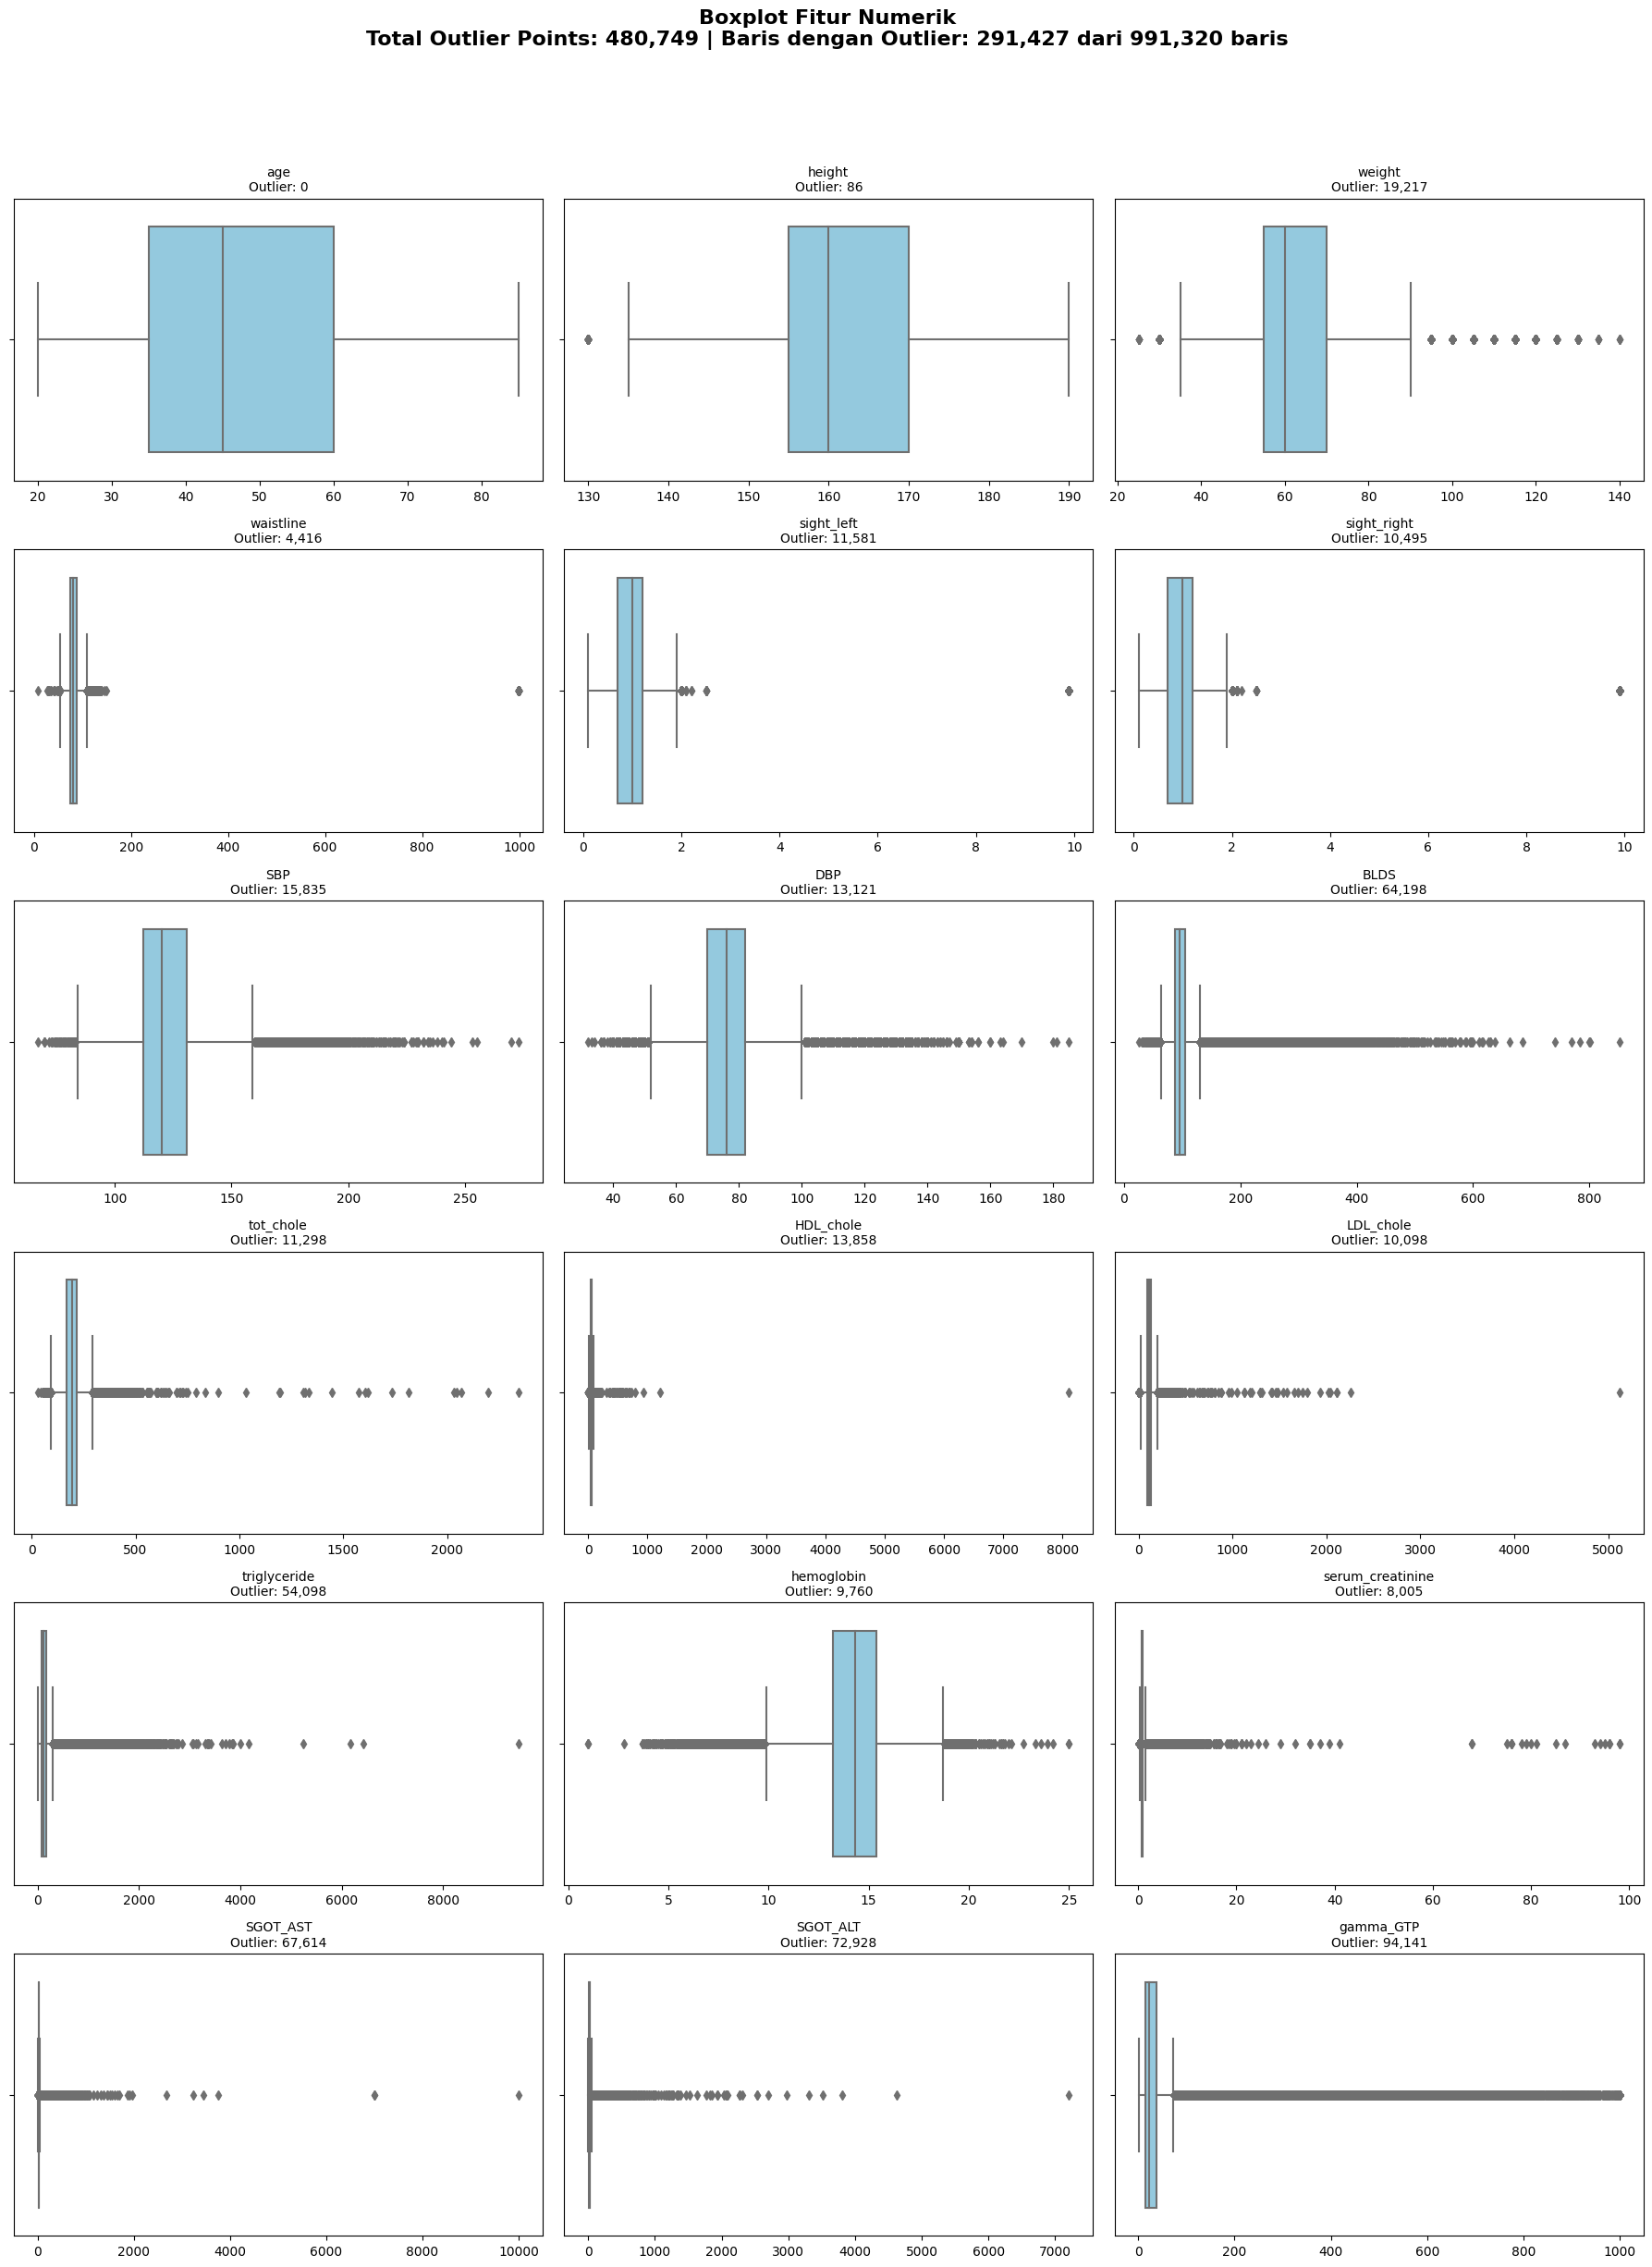

In [11]:
# Fungsi deteksi outlier berdasarkan IQR
def detect_outliers_iqr(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return (df[col] < low) | (df[col] > high)

# Deteksi outlier
outlier_info = {}
total_outlier_points = 0
outlier_rows = pd.Series(False, index=df.index)

for col in kolom_numerik:
    mask_outlier = detect_outliers_iqr(df, col)
    n_outlier = mask_outlier.sum()
    outlier_info[col] = n_outlier
    total_outlier_points += n_outlier
    outlier_rows |= mask_outlier 

total_outlier_rows = outlier_rows.sum()

n_cols = 3
n_rows = int(np.ceil(len(kolom_numerik) / n_cols))

plt.figure(figsize=(6 * n_cols, 4 * n_rows))
for i, col in enumerate(kolom_numerik):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"{col}\nOutlier: {outlier_info[col]:,}", fontsize=10)
    plt.xlabel("")

plt.suptitle(
    f"Boxplot Fitur Numerik\nTotal Outlier Points: {total_outlier_points:,} | "
    f"Baris dengan Outlier: {total_outlier_rows:,} dari {len(df):,} baris",
    fontsize=16, fontweight='bold', y=1.02
)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Terapkan Winsorization (1%–99%)

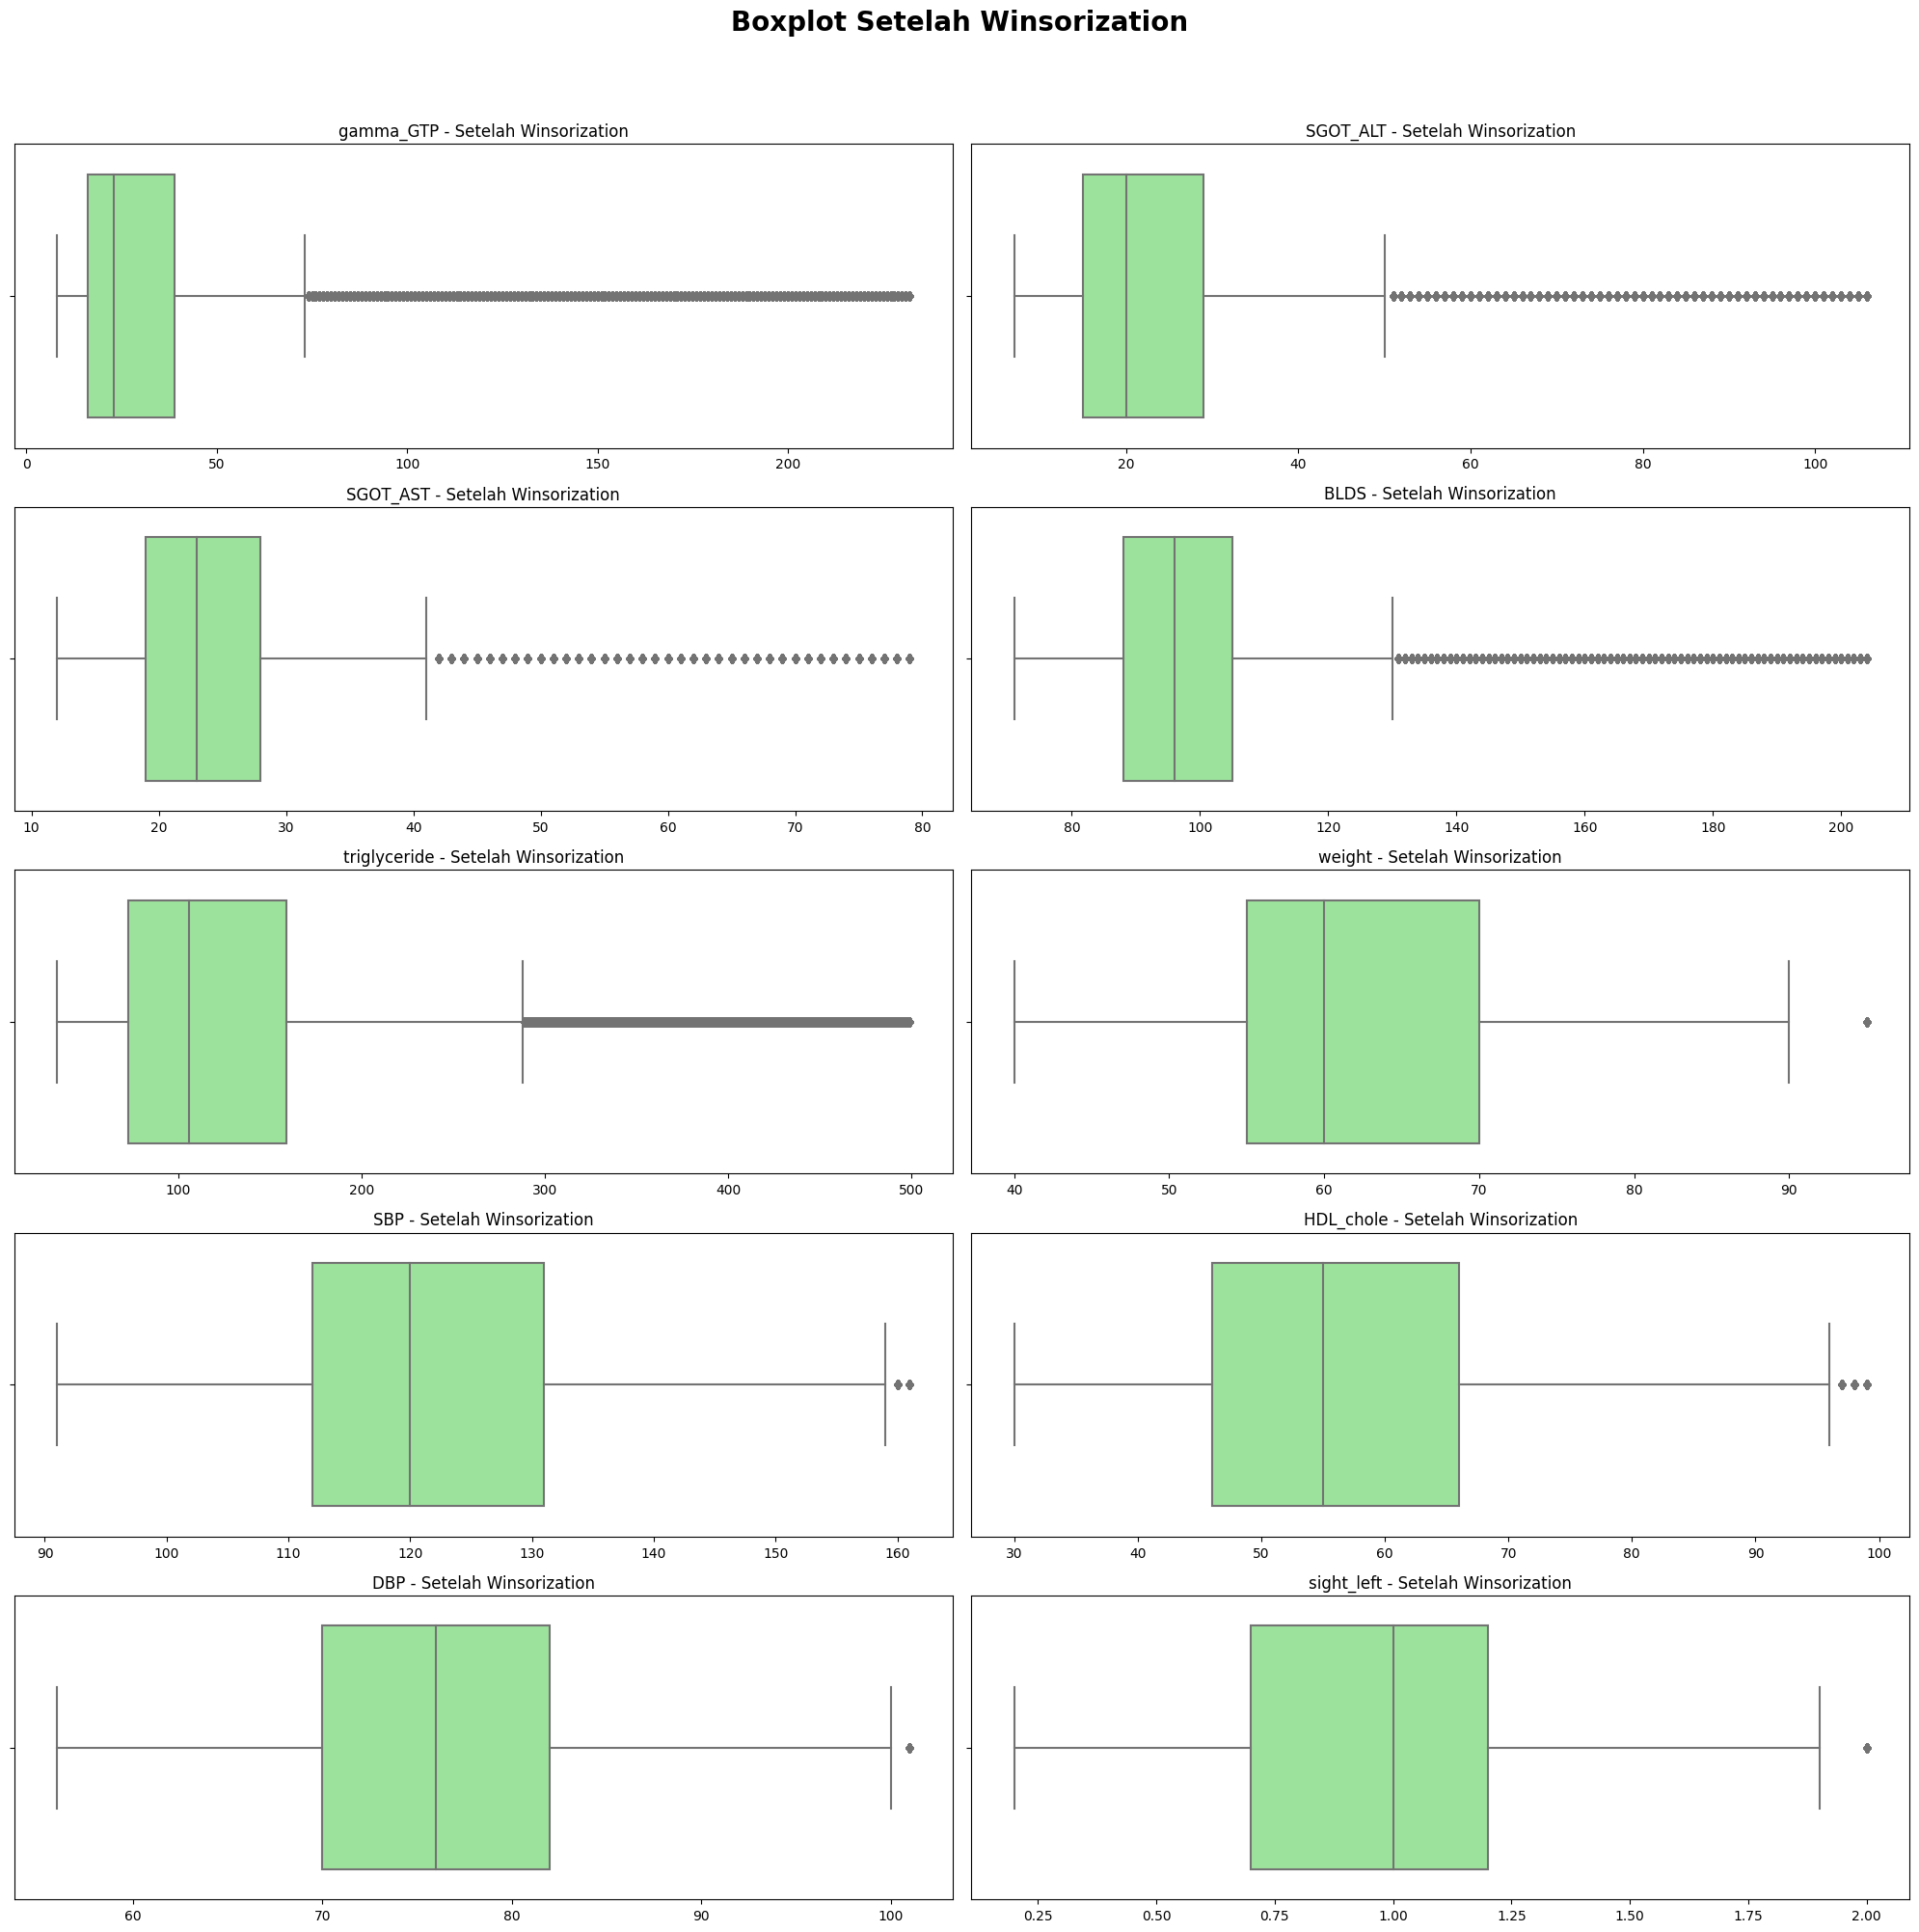

In [12]:
# Ambil 10 kolom dengan outlier terbanyak dari kolom numerik
outlier_sorted = sorted(outlier_info.items(), key=lambda x: x[1], reverse=True)
top_outlier_cols = [col for col, count in outlier_sorted if col in kolom_numerik][:10]

# Winsorization (potong outlier ekstrem di quantile 1% dan 99%)
for col in top_outlier_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df.loc[:, col] = np.clip(df[col], lower, upper)

plt.figure(figsize=(20, 20))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"{col} - Setelah Winsorization", fontsize=12)
    plt.xlabel("")

plt.suptitle("Boxplot Setelah Winsorization", fontsize=20, fontweight='bold', y=1)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Processing

In [13]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()
for col in kategorikal:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [14]:
df_encoded

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,0,0,120.0,...,126.0,92.0,17.1,0,1.0,21.0,35.0,40.0,0,Y
1,1,30,180,80,89.0,0.9,1.2,0,0,130.0,...,148.0,121.0,15.8,0,0.9,20.0,36.0,27.0,2,N
2,1,40,165,75,91.0,1.2,1.5,0,0,120.0,...,74.0,104.0,15.8,0,0.9,47.0,32.0,68.0,0,N
3,1,50,175,80,91.0,1.5,1.2,0,0,145.0,...,104.0,106.0,17.6,0,1.1,29.0,34.0,18.0,0,N
4,1,50,165,60,80.0,1.0,1.2,0,0,138.0,...,117.0,104.0,13.8,0,0.8,19.0,12.0,25.0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,0,0,114.0,...,125.0,132.0,15.0,0,1.0,26.0,36.0,27.0,0,N
991342,1,35,170,75,86.0,1.0,1.5,0,0,119.0,...,84.0,45.0,15.8,0,1.1,14.0,17.0,15.0,0,N
991343,0,40,155,50,68.0,1.0,0.7,0,0,110.0,...,77.0,157.0,14.3,0,0.8,30.0,27.0,17.0,2,Y
991344,1,25,175,60,72.0,1.5,1.0,0,0,119.0,...,73.0,53.0,14.5,0,0.8,21.0,14.0,17.0,0,N


In [15]:
df_encoded['DRK_YN'] = df_encoded['DRK_YN'].map({'N': 0, 'Y': 1}).astype(int)

In [16]:
print(df_encoded['DRK_YN'].unique())

[1 0]


In [17]:
X = df_encoded.drop('DRK_YN', axis=1)
y = df_encoded['DRK_YN']

## Seleksi Fitur

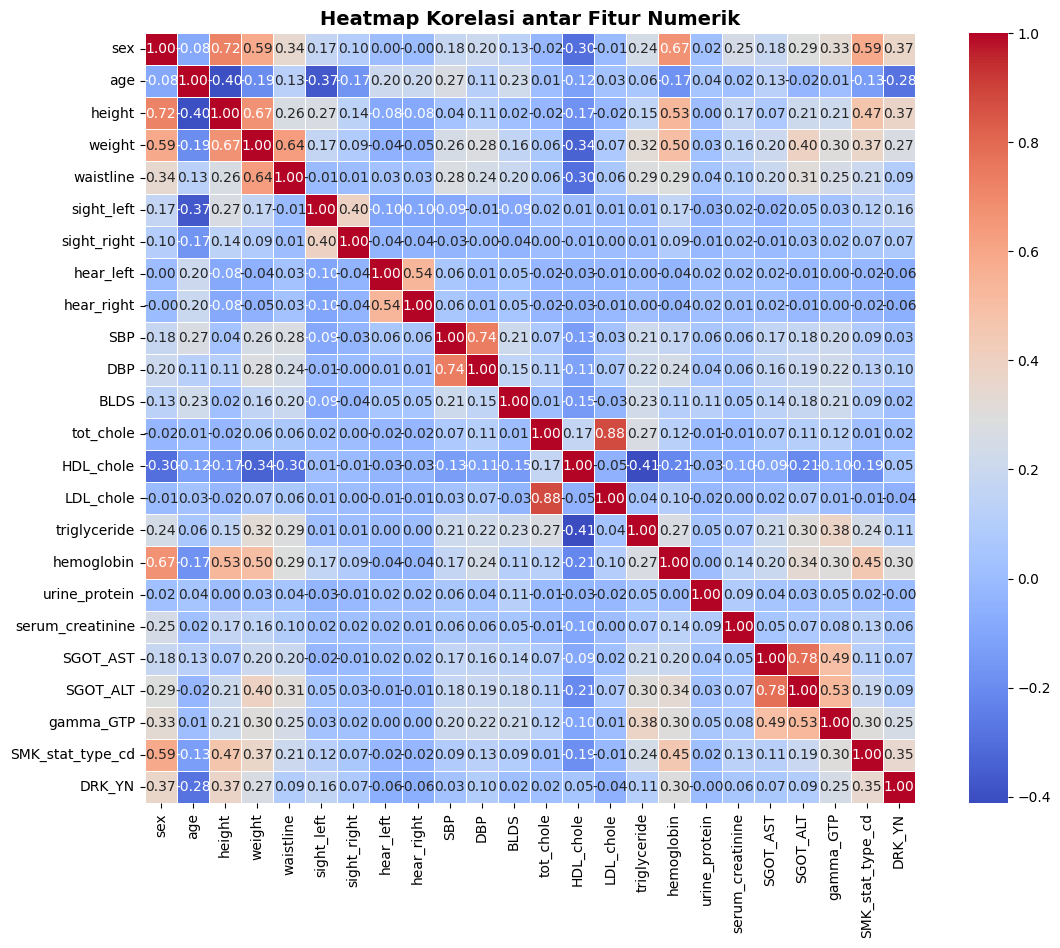

In [18]:
corr_matrix =df_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Heatmap Korelasi antar Fitur Numerik", fontsize=14, weight='bold')
plt.show()

In [19]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = upper.stack().reset_index()
high_corr.columns = ['Fitur 1', 'Fitur 2', 'Korelasi']
high_corr = high_corr[high_corr['Korelasi'].abs() > 0.9].sort_values(by='Korelasi', ascending=False)

print("Pasangan fitur numerik dengan korelasi tinggi (> 0.9):")
display(high_corr)

Pasangan fitur numerik dengan korelasi tinggi (> 0.9):


,Fitur 1,Fitur 2,Korelasi


In [20]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.125,
    random_state=42,
    stratify=y_temp
)

print("Train :", X_train.shape)
print("Val   :", X_val.shape)
print("Test  :", X_test.shape)


Train : (693924, 23)
Val   : (99132, 23)
Test  : (198264, 23)


In [21]:
from sklearn.preprocessing import RobustScaler

numerik = ['age', 'height', 'weight', 'waistline','sight_left', 'sight_right',
           'SBP', 'DBP', 'BLDS','tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 
           'serum_creatinine','SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

scaler = RobustScaler()

X_train[numerik] = scaler.fit_transform(X_train[numerik])
X_test[numerik] = scaler.transform(X_test[numerik])
X_val[numerik] = scaler.transform(X_val[numerik])

In [22]:
X_train.head(20)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
565920,0,-0.8,-0.666667,-0.333333,-0.882353,0.0,0.0,0,0,-0.526316,...,0.30,0.326087,-0.500000,-0.545455,0,0.000000,-0.222222,-0.357143,-0.391304,0
616392,0,-0.8,0.333333,-1.000000,-1.397059,0.4,1.0,0,0,-0.736842,...,-0.25,-0.173913,-0.465116,-0.363636,0,-0.333333,-0.333333,-0.928571,-0.391304,0
294123,1,0.2,0.666667,1.666667,0.794118,0.4,-0.4,0,0,0.052632,...,-1.00,-0.217391,2.093023,0.636364,0,0.333333,-0.111111,0.714286,0.347826,1
659006,0,0.2,-0.333333,-1.000000,-1.213235,0.0,0.0,0,0,-1.421053,...,0.75,-0.108696,-0.197674,-1.454545,0,-0.333333,-0.111111,0.071429,-0.217391,0
240093,0,1.2,-0.666667,1.000000,1.838235,-1.0,-0.6,0,0,0.684211,...,-0.90,-0.282609,0.348837,-0.318182,0,-0.333333,-0.333333,0.000000,-0.391304,0
62632,0,-0.6,-0.333333,-0.666667,-0.941176,0.0,0.0,0,0,-1.263158,...,0.60,-0.695652,-0.581395,-0.818182,0,0.333333,-0.333333,-0.642857,-0.565217,0
662507,1,0.2,0.333333,1.000000,0.147059,2.0,-0.2,0,0,0.631579,...,-0.60,1.108696,0.674419,1.000000,0,1.333333,0.444444,1.428571,1.956522,2
135999,1,-0.2,0.333333,1.333333,0.294118,-0.2,-0.8,0,0,1.789474,...,-0.05,0.608696,-0.034884,0.363636,0,0.666667,0.666667,0.428571,-0.130435,1
836383,0,1.0,-0.666667,0.333333,0.323529,-0.4,0.4,0,0,1.052632,...,0.50,1.065217,0.534884,0.636364,0,-0.333333,-0.888889,0.357143,-0.130435,0
232221,1,0.6,0.333333,1.000000,1.250000,0.4,0.0,0,0,-0.105263,...,-0.35,0.326087,-0.569767,-0.272727,0,0.000000,-0.333333,-0.500000,1.043478,1


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [24]:
# Sebelum SMOTE
print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

# Sesudah SMOTE
print("\nDistribusi label sesudah SMOTE:")
print(y_train_bal.value_counts())

Distribusi label sebelum SMOTE:
DRK_YN
0    347091
1    346833
Name: count, dtype: int64

Distribusi label sesudah SMOTE:
DRK_YN
1    347091
0    347091
Name: count, dtype: int64


# Model

## Tabnet

In [25]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [26]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier

X_train_np = X_train_bal.to_numpy().astype('float32')
X_val_np = X_val.to_numpy().astype('float32')
X_test_np = X_test.to_numpy().astype('float32')

y_train_np = y_train_bal.to_numpy().astype('int64')
y_val_np = y_val.to_numpy().astype('int64')
y_test_np = y_test.to_numpy().astype('int64')

In [27]:
from pytorch_tabnet.metrics import Metric
from sklearn.preprocessing import LabelEncoder
import torch
from pytorch_tabnet.tab_model import TabNetClassifier

tabnet_model = TabNetClassifier(
    n_d=64,
    n_a=56,
    n_steps=4,
    gamma=1.38,
    mask_type='sparsemax',
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.0026),
    verbose=1
)

tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy', 'auc'],
    max_epochs=100,
    patience=30,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.5875  | val_accuracy: 0.71477 | val_auc: 0.7919  |  0:00:36s
epoch 1  | loss: 0.54388 | val_accuracy: 0.72668 | val_auc: 0.80493 |  0:01:11s
epoch 2  | loss: 0.53431 | val_accuracy: 0.72768 | val_auc: 0.80846 |  0:01:46s
epoch 3  | loss: 0.53004 | val_accuracy: 0.73103 | val_auc: 0.81251 |  0:02:21s
epoch 4  | loss: 0.52792 | val_accuracy: 0.7327  | val_auc: 0.81356 |  0:02:56s
epoch 5  | loss: 0.52535 | val_accuracy: 0.73276 | val_auc: 0.81508 |  0:03:31s
epoch 6  | loss: 0.52459 | val_accuracy: 0.73385 | val_auc: 0.81479 |  0:04:06s
epoch 7  | loss: 0.52399 | val_accuracy: 0.73419 | val_auc: 0.81593 |  0:04:40s
epoch 8  | loss: 0.52373 | val_accuracy: 0.73337 | val_auc: 0.8149  |  0:05:15s
epoch 9  | loss: 0.52283 | val_accuracy: 0.73438 | val_auc: 0.8163  |  0:05:49s
epoch 10 | loss: 0.52193 | val_accuracy: 0.73446 | val_auc: 0.81609 |  0:06:23s
epoch 11 | loss: 0.52132 | val_accuracy: 0.73548 | val_auc: 0.81789 |  0:06:58s
epoch 12 | loss: 0.51964 | val_accuracy:

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report (TabNet - Test Set):
              precision    recall  f1-score   support

          No       0.74      0.74      0.74     99169
         Yes       0.74      0.74      0.74     99095

    accuracy                           0.74    198264
   macro avg       0.74      0.74      0.74    198264
weighted avg       0.74      0.74      0.74    198264



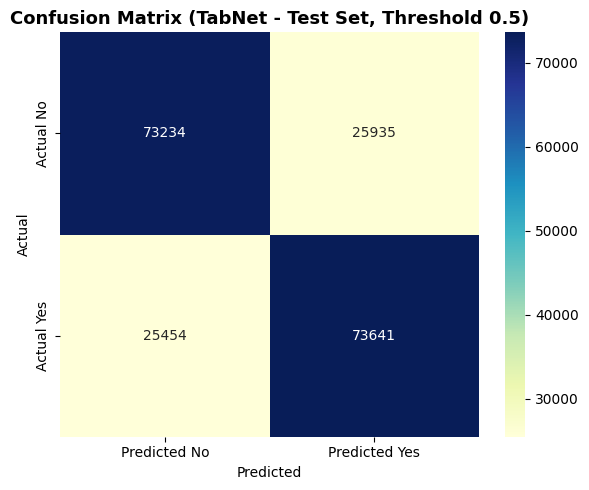

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = (tabnet_model.predict_proba(X_test_np)[:, 1] > 0.5).astype(int)

print("Classification Report (TabNet - Test Set):")
print(classification_report(y_test_np, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test_np, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (TabNet - Test Set, Threshold 0.5)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

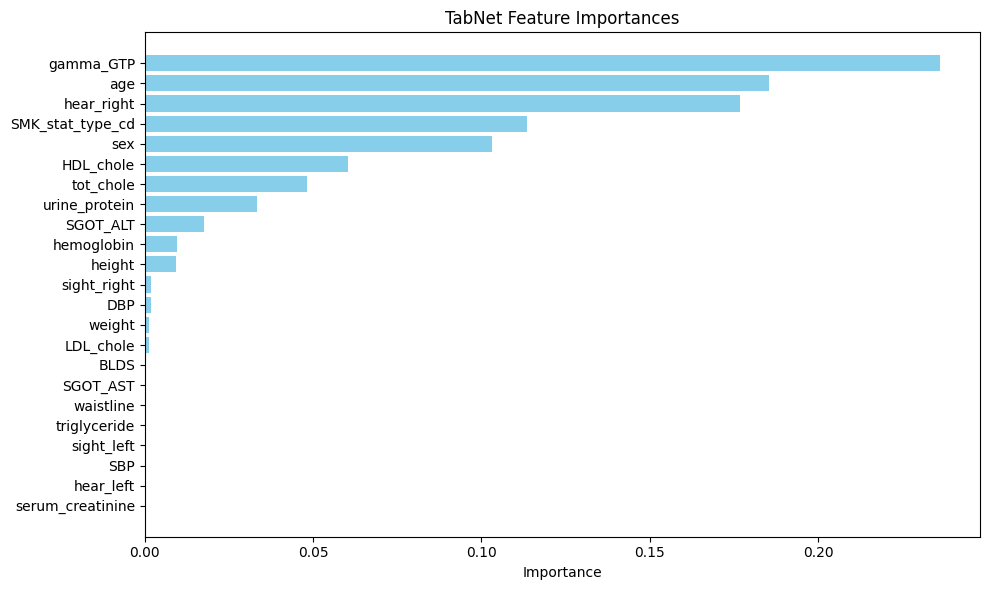

In [29]:
feat_importances = tabnet_model.feature_importances_
feat_names = X_train_bal.columns

fi_df = pd.DataFrame({'Feature': feat_names, 'Importance': feat_importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'], color='skyblue')
plt.title('TabNet Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [30]:
feat_imp_df = pd.DataFrame({
    'feature': feat_names,
    'importance': feat_importances
})

# Urutkan dari paling penting ke paling kecil
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Lihat top-n (misalnya 10)
top_n = 10
top_features = feat_imp_df.head(top_n)['feature'].tolist()
print(top_features)


['gamma_GTP', 'age', 'hear_right', 'SMK_stat_type_cd', 'sex', 'HDL_chole', 'tot_chole', 'urine_protein', 'SGOT_ALT', 'hemoglobin']


In [31]:
X_train_top = X_train_bal[top_features]
X_val_top = X_val[top_features]
X_test_top = X_test[top_features]

## Random Forest

=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

          No       0.72      0.72      0.72     99169
         Yes       0.72      0.72      0.72     99095

    accuracy                           0.72    198264
   macro avg       0.72      0.72      0.72    198264
weighted avg       0.72      0.72      0.72    198264



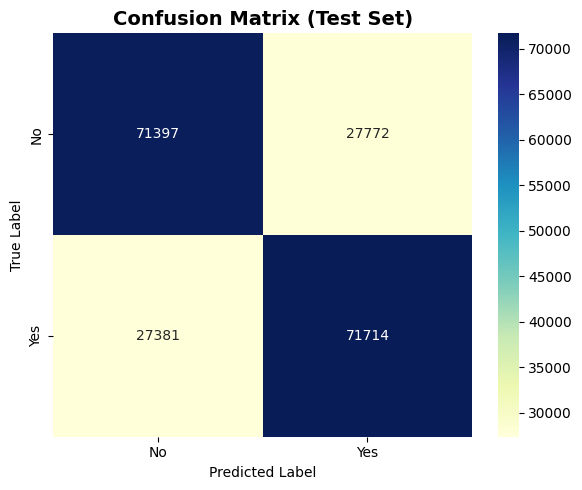

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_rf= RandomForestClassifier(random_state=42)
model_rf.fit(X_train_top, y_train_bal)

y_test_pred = model_rf.predict(X_test_top)
print("=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=100,
    early_stopping=True,
    random_state=42
)
mlp_model.fit(X_train_top, y_train_np)

y_test_pred_mlp = mlp_model.predict(X_test_top)

print("Classification Report (MLP - Test Set):")
print(classification_report(y_test_np, y_test_pred_mlp, target_names=['No', 'Yes']))


Classification Report (MLP - Test Set):
              precision    recall  f1-score   support

          No       0.74      0.72      0.73     99169
         Yes       0.73      0.75      0.74     99095

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



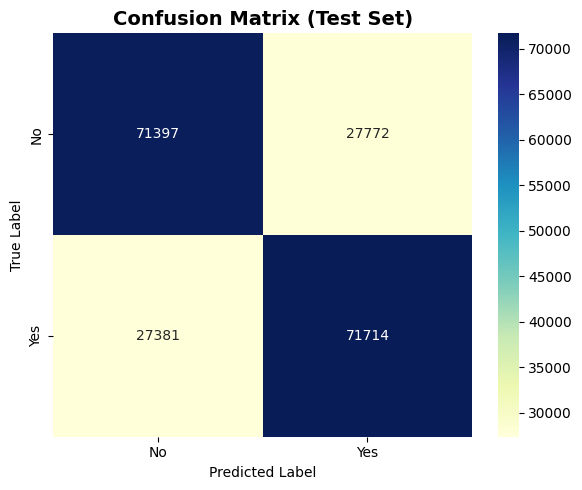

In [34]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()